In [62]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [63]:
df_exercise = pd.read_csv('exercise.csv')
df_calories = pd.read_csv('calories.csv')

In [64]:
df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [65]:
df_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [66]:
dff_exercise = df_exercise.merge(df_calories, on='User_ID')

In [67]:
dff_exercise.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [68]:
dff_exercise.shape

(15000, 9)

In [69]:
dff_exercise.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [70]:
dff_exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [71]:
dff_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Null Value

In [72]:
dff_exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#  DROP Duplicated VALUE

In [73]:
print("Shape of the dataset before removing duplicates:", dff_exercise.shape)
dff_exercise = dff_exercise.drop_duplicates(subset=['User_ID'], keep='first')
print("Shape of the dataset after removing duplicates:", dff_exercise.shape)

Shape of the dataset before removing duplicates: (15000, 9)
Shape of the dataset after removing duplicates: (15000, 9)


remove low predictive column

In [74]:
dff_exercise = dff_exercise.drop(columns="User_ID")
dff_exercise.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [75]:
dff_exercise.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [76]:
exercise_train, exercise_test = train_test_split(dff_exercise, test_size=0.2, random_state=42)
print("Training set shape:", exercise_train.shape)
print("Testing set shape:", exercise_test.shape)

Training set shape: (12000, 8)
Testing set shape: (3000, 8)


<Axes: >

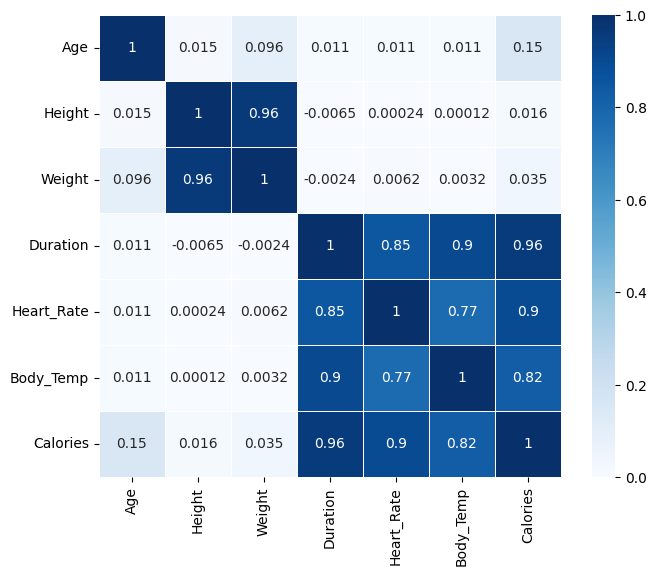

In [77]:
plt.rcParams["figure.figsize"] = 8 , 6
corr = exercise_train.corr(numeric_only = True)
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

In [78]:
exercise_train_data = pd.get_dummies(exercise_train, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test, drop_first = True)

In [79]:
exercise_train_data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
9839,37,179.0,77.0,7.0,81.0,39.5,17.0,True
9680,23,195.0,87.0,26.0,110.0,40.5,167.0,True
7093,33,181.0,77.0,12.0,88.0,40.1,40.0,True
11293,66,156.0,54.0,9.0,77.0,39.5,34.0,False
820,32,144.0,49.0,5.0,90.0,39.0,23.0,False


In [ ]:
# Prepare X/y
X_train = exercise_train_data.drop(columns='Calories') # independent variables
y_train = exercise_train_data['Calories']              # dependent variable
X_test = exercise_test_data.drop(columns='Calories')
y_test = exercise_test_data['Calories']

In [ ]:
# Scale numeric columns only
from sklearn.preprocessing import StandardScaler
num_cols = X_train.select_dtypes(include=['int64','float64','float32','float16']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [82]:
X_train

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
9839,-0.337295,0.323232,0.139551,-1.021889,-1.517377,-0.671031,True
9680,-1.163322,1.447924,0.805955,1.266663,1.522425,0.614490,True
7093,-0.573303,0.463818,0.139551,-0.419638,-0.783631,0.100281,True
11293,1.373763,-1.293513,-1.393179,-0.780988,-1.936660,-0.671031,False
820,-0.632304,-2.137032,-1.726381,-1.262789,-0.573990,-1.313791,False
...,...,...,...,...,...,...,...
5191,1.904780,-1.855859,-1.593100,0.784863,0.893501,0.743042,False
13418,-1.281326,-0.168821,-0.526854,0.543963,0.893501,0.871594,False
5390,0.842745,1.026164,1.139157,-0.901439,-0.573990,-0.671031,True
860,-0.455299,-0.028234,0.072910,-0.419638,0.159756,0.228833,True


In [83]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)

In [84]:
from sklearn import metrics

In [85]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  8.44
Linear Regression Mean Squared Error(MSE) :  132.0
Linear Regression Root Mean Squared Error(RMSE) :  11.49


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [ ]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.19
RandomForest Mean Squared Error(MSE) :  59.99
RandomForest Root Mean Squared Error(RMSE) :  7.75
